In [1]:
# [Hamza, Munir]
# [Student number]
# [MMA]
# MMA 869
# [15/08/2020]


# Answer to Question 7, Part 2

In [2]:
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np 
import pandas as pd
import pandas_profiling

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

In [3]:
import os
os.getcwd()

'C:\\Users\\hp\\Documents\\Smith School of Business\\M896-ML & AI\\Assignment 1'

# Part (a). Load, Clean & Preprocess the Data

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/stepthom/sandbox/master/data/OJ.csv")

In [8]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              1070 non-null   int64  
 1   Purchase        1070 non-null   object 
 2   WeekofPurchase  1070 non-null   int64  
 3   StoreID         1070 non-null   int64  
 4   PriceCH         1070 non-null   float64
 5   PriceMM         1070 non-null   float64
 6   DiscCH          1070 non-null   float64
 7   DiscMM          1070 non-null   float64
 8   SpecialCH       1070 non-null   int64  
 9   SpecialMM       1070 non-null   int64  
 10  LoyalCH         1070 non-null   float64
 11  SalePriceMM     1070 non-null   float64
 12  SalePriceCH     1070 non-null   float64
 13  PriceDiff       1070 non-null   float64
 14  Store7          1070 non-null   object 
 15  PctDiscMM       1070 non-null   float64
 16  PctDiscCH       1070 non-null   float64
 17  ListPriceDiff   1070 non-null   f

,ID,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


## Missing value analysis

In [25]:
df.isnull().sum()

Unnamed: 0        0
Purchase          0
WeekofPurchase    0
StoreID           0
PriceCH           0
PriceMM           0
DiscCH            0
DiscMM            0
SpecialCH         0
SpecialMM         0
LoyalCH           0
SalePriceMM       0
SalePriceCH       0
PriceDiff         0
Store7            0
PctDiscMM         0
PctDiscCH         0
ListPriceDiff     0
STORE             0
dtype: int64

In [6]:
target_col = 'Purchase'

Class 0: 653
Class 1: 417
Proportion: 1.57 : 1


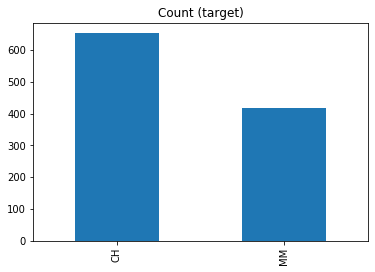

In [7]:
target_count = df.Purchase.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

The data is almost equal to balanced with the ratio 1.57 so we don't to rebalance the data as otherwise it would not reflect the actual results 

In [8]:
#Drop the target variable from the data frame and assign it as y-fetaure
X = df.drop([target_col], axis=1)
y = df[target_col]

#### By using encoding, we will convert Citrus Hill to 0 and Minute Maid to 1 

In [9]:
# ordinal encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [10]:
# "Cleaning" the data -- wrapping up: creating dummy variables for non-numbers ("one hot encoding")
X = pd.get_dummies(X, columns = X.select_dtypes(exclude=['int64','float64']).columns, drop_first = True)

pd.options.display.max_columns = None # remove the limit on the number of columns by default only 20 are shows

X.head()  # our dataset now has 252 columns(!)

,Unnamed: 0,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Store7_Yes
0,1,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0.000000,0.000000,0.24,1,0
1,2,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0.150754,0.000000,0.24,1,0
2,3,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0.000000,0.091398,0.23,1,0
3,4,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0.000000,0.000000,0.00,1,0
4,5,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,0.000000,0.000000,0.00,0,1


# Part (b). Split the data into train-test

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We divided data into train 80% and test 20%. Once we train the model on 80% of the data and then running the model on remaining 20% of the data to see how our model is performing. To identify we can look into multiple meaures such as AUC, ROC curve etc.

In [12]:
X.shape
X_train.shape

(1070, 18)

(856, 18)

# Part(C). Build three different models 

## 1.Random Forest 

In [13]:
# First we define a set of functions to compute the metrics of the model

# ROC curve
def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

# Confusion Matrix returns in the format: cm[0,0], cm[0,1], cm[1,0], cm[1,1]: tn, fp, fn, tp

# Sensitivity
def custom_sensitivity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fn))

# Specificity
def custom_specificity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fp))

# Positive Predictive Value
def custom_ppv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fp))

# Negative Predictive Value
def custom_npv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fn))

# Accuracy
def custom_accuracy_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ((tn+tp)/(tn+tp+fn+fp))


In [14]:
# Define a random forest model and call it classifier_RF
classifier_RF = RandomForestClassifier(random_state=77300) # recall what random_state mean

# Train the model classifier_RF on the training data
classifier_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=77300,
                       verbose=0, warm_start=False)

Metrics of the Random Forest model: 

Confusion matrix: 
[[106  30]
 [ 24  54]]
                                   Accuracy: 0.7476635514018691
                   SENSITIVITY (aka RECALL): 0.6428571428571429
                 SPECIFICITY (aka FALL-OUT): 0.8153846153846154
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.6923076923076923
                 NEGATIVE PREDICTIVE VALUE): 0.7794117647058824


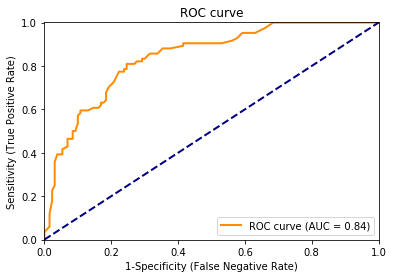

 AUC: 0.8413003663003663


In [15]:
class_threshold = 0.50
y_pred_prob = classifier_RF.predict_proba(X_test)[:,1] # probabilities 
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

# Lets look at the model metrics

print('Metrics of the Random Forest model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

### Hyper Parameter tuning -Random Forest 

Optimized hyper-parameters:{'n_estimators': 600}
Metrics of the Random Forest model with the optimized hyper-parameter for the "number of trees": 

Confusion matrix: 
[[106  29]
 [ 24  55]]
                                   Accuracy: 0.7523364485981309
                   SENSITIVITY (aka RECALL): 0.6547619047619048
                 SPECIFICITY (aka FALL-OUT): 0.8153846153846154
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.6962025316455697
                 NEGATIVE PREDICTIVE VALUE): 0.7851851851851852


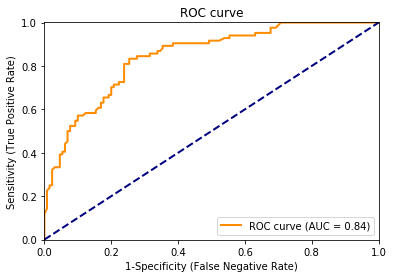

 AUC: 0.843956043956044


In [16]:
# Hyper-parameter tuning ("optimization") using the function GridSearchCV for maximizing AUC
score_func = make_scorer(roc_auc_score, greater_is_better=True)

n_trees = [100, 200, 300, 400, 500, 600] # as an example, we will tune the "numeber of trees" hyper-parameter (n_trees) and we will consider values of 100, 200, ... 600 trees in the forest
Grid_srch_parameters_list = [ [{'n_estimators':n_trees}] ] 

# we will apply a 5-fold cross-validation and call the resultant function "grid_search"
grid_search = GridSearchCV(estimator = classifier_RF, cv = 5, param_grid = Grid_srch_parameters_list[0], scoring = score_func,
                              return_train_score = True) 

# apply function grid_search to the training data, call the resultand best model grid_search_RF
grid_search_RF = grid_search.fit(X_train, y_train)

# use the best model to predict the testing data
y_pred_prob = grid_search_RF.predict_proba(X_test)[:,1] # probabilities  
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

print('Optimized hyper-parameters:' + str(grid_search.best_params_))
    
# Lets look at the model metrics

print('Metrics of the Random Forest model with the optimized hyper-parameter for the "number of trees": \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))


## 2.Gradient Boosting 

In [17]:
# Define the gradient boosting machine model and call it classifier_GBM
classifier_GBM = GradientBoostingClassifier(random_state=77300)

# Train the model classifier_GBM on the training data
classifier_GBM.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=77300, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Metrics of the Gradient Boosting Machine model: 

Confusion matrix: 
[[114  23]
 [ 16  61]]
                                   Accuracy: 0.8177570093457944
                   SENSITIVITY (aka RECALL): 0.7261904761904762
                 SPECIFICITY (aka FALL-OUT): 0.8769230769230769
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.7922077922077922
                 NEGATIVE PREDICTIVE VALUE): 0.8321167883211679


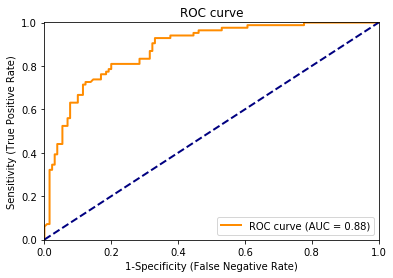

 AUC: 0.8787545787545787


In [18]:
# Use the trained model to predict testing data
y_pred_prob = classifier_GBM.predict_proba(X_test)[:,1] # probabilities 
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

# Lets look at the model metrics

print('Metrics of the Gradient Boosting Machine model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

### Hyper-parameter tuning- Gradient Boosting 

Optimized hyper-parameters:{'learning_rate': 0.01, 'n_estimators': 300}
Metrics of the Gradient Boosting Machine model with the optimized hyper-parameters": 

Confusion matrix: 
[[115  27]
 [ 15  57]]
                                   Accuracy: 0.8037383177570093
                   SENSITIVITY (aka RECALL): 0.6785714285714286
                 SPECIFICITY (aka FALL-OUT): 0.8846153846153846
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.7916666666666666
                 NEGATIVE PREDICTIVE VALUE): 0.8098591549295775


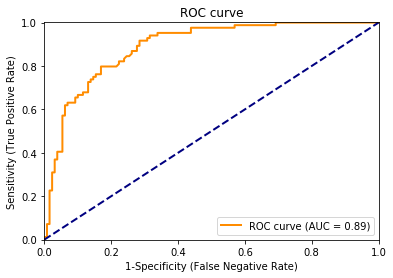

 AUC: 0.889606227106227


In [19]:
# Hyper-parameter tuning ("optimization") using the function GridSearchCV for maximizing AUC
score_func = make_scorer(roc_auc_score, greater_is_better=True)

# as an example, we will tune two parameters
n_trees = [100, 200, 300, 400, 500, 600] # first, the "numeber of trees" hyper-parameter (n_trees) and we will consider values of 100, 200, ... 600 trees in the forest
learning_rates = [0.01, 0.1] # second, speed of boosting ("learning rate") and we will use two values 0.01 и 0.1

Grid_srch_parameters_list = [ [{'n_estimators':n_trees, 'learning_rate': learning_rates}] ] 

# we will apply a 5-fold cross-validation and call the resultant function "grid_search"
grid_search = GridSearchCV(estimator = classifier_GBM, cv = 5, param_grid = Grid_srch_parameters_list[0], scoring = score_func,
                              return_train_score = True) 

# # apply function grid_search to the training data, call the resultant best model grid_search_GBM
grid_search_GBM = grid_search.fit(X_train, y_train)

# use the best model to predict the testing data 
y_pred_prob = grid_search_GBM.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

print('Optimized hyper-parameters:' + str(grid_search.best_params_))

# Lets look at the model metrics

print('Metrics of the Gradient Boosting Machine model with the optimized hyper-parameters": \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))


### Summary for Graident Boosting  
Trained the model on 80% of the data .By doing hyper parameter tuning, the AUC has been increased to 88.96% from 87.85%

## 3. Logistic Regression 

In [20]:
# define the model and call it classifier_LR
classifier_LR = LogisticRegression()

# train classifier_LR on the training data
classifier_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
# Use the trained model to predict testing data

y_pred_prob = classifier_LR.predict_proba(X_test)[:,1] # probabilities

# Select the threshold value -- we will use Т=0.6073. Why? Why not 50%? Because 60.73% -- is the average probability of retention in our data (1451 "1"s out of 2389 datapoints) 
class_threshold = 0.6073

y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # applying the threshold rule to classify

print(y_pred_prob[0:5]) # first 5 probabilities 
print(y_pred[0:5]) # resultant predicted classification 
print(y_test[0:5]) # actual outcomes

# oops ... for the first 5 customers our model made two mistakes: on 1st customer ("false positive") and on 3rd customer ("false negative")

[0.14005338 0.76909722 0.38573027 0.36406987 0.96609695]
[0 1 0 0 1]
[0 1 0 0 0]


Metrics of the logistic regression model: 

Confusion matrix: 
[[121  31]
 [  9  53]]
                                   Accuracy: 0.8130841121495327
                   SENSITIVITY (aka RECALL): 0.6309523809523809
                 SPECIFICITY (aka FALL-OUT): 0.9307692307692308
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.8548387096774194
                 NEGATIVE PREDICTIVE VALUE): 0.7960526315789473


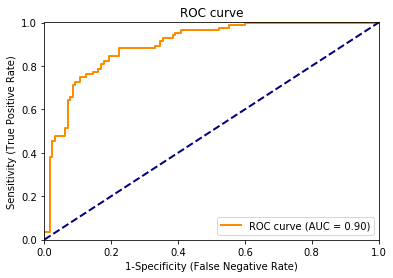

 AUC: 0.8971611721611721


In [22]:
# Lets look at the model metrics 
print('Metrics of the logistic regression model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

In [23]:
# Apply variable selection with Stepwise Recursive Feature Selection 

from sklearn.feature_selection import RFE

rfe = RFE(estimator=classifier_LR, n_features_to_select=20, step=1) # in this example we will select 20 variables; this number "20" is a hyperparameter to tune
rfe.fit(X_train, y_train)
ranking = rfe.ranking_.reshape(len(X_train.columns))

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=20, step=1, verbose=0)

Metrics of the logistic regression model after variable selection: 

Confusion matrix: 
[[121  31]
 [  9  53]]
                                   Accuracy: 0.8130841121495327
                   SENSITIVITY (aka RECALL): 0.6309523809523809
                 SPECIFICITY (aka FALL-OUT): 0.9307692307692308
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.8548387096774194
                 NEGATIVE PREDICTIVE VALUE): 0.7960526315789473


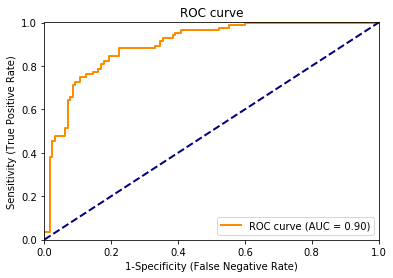

 AUC: 0.8971611721611721


In [24]:
# Train the model and call it classifier_LR_RFE 
classifier_LR_RFE = rfe.fit(X_train, y_train)

# Use the trained model to predict testing data
y_pred_prob = classifier_LR_RFE.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification


# Lets look at the model metrics after variable selection 
print('Metrics of the logistic regression model after variable selection: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

### Summary for Logistic Regression 
Trained the model on 80% of the data .By using logistic regression we are getting highest AUC which is 89.71%